Linear Regression: Simple & Multiple Implementation and Understanding
Linear regression is a foundational technique in predictive modeling, used to quantify the relationship between one dependent variable and one or more independent variables. Below is a comprehensive guide to implementing and understanding both simple and multiple linear regression using Python's Scikit-learn, Pandas, and Matplotlib.

Simple linear regression models the relationship between a single independent variable (x) and a dependent variable (y) using the equation:
y=mx+b
m: Slope (effect of x on y)
b: Intercept (predicted y when x=0)
Each coefficient represents the expected change in y for a one-unit change in x

1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

2. Load Dataset

In [2]:
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

 3. Simple Linear Regression (using 'AveRooms' as the only predictor)

In [3]:
print("\n--- Simple Linear Regression (AveRooms) ---")
X_simple = X[['AveRooms']]  # Select a single feature



--- Simple Linear Regression (AveRooms) ---


Split into train and test sets

In [5]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

Feature scaling


In [7]:
scaler_s = StandardScaler()
X_train_s_scaled = scaler_s.fit_transform(X_train_s)
X_test_s_scaled = scaler_s.transform(X_test_s)

Train the model

In [8]:
model_simple = LinearRegression()
model_simple.fit(X_train_s_scaled, y_train_s)

LinearRegression()

Make predictions

In [9]:
y_pred_s = model_simple.predict(X_test_s_scaled)

Evaluate

In [10]:
print("Coefficient (slope):", model_simple.coef_[0])
print("Intercept:", model_simple.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test_s, y_pred_s))
print("R-squared:", r2_score(y_test_s, y_pred_s))


Coefficient (slope): 0.18323881713491502
Intercept: 2.071946937378876
Mean Squared Error: 1.29233144408073
R-squared: 0.01379533753228468


Visualization

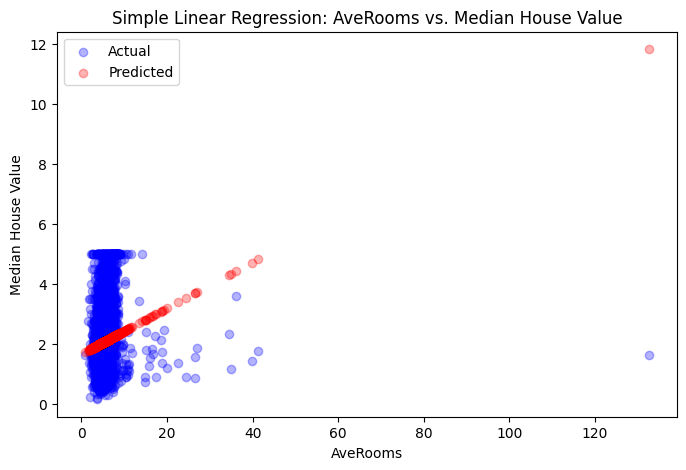

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test_s, y_test_s, color='blue', alpha=0.3, label='Actual')
plt.scatter(X_test_s, y_pred_s, color='red', alpha=0.3, label='Predicted')
plt.xlabel('AveRooms')
plt.ylabel('Median House Value')
plt.title('Simple Linear Regression: AveRooms vs. Median House Value')
plt.legend()
plt.show()

Multiple Linear Regression

In [12]:
print("\n--- Multiple Linear Regression (All Features) ---")
# Split into train and test sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X, y, test_size=0.2, random_state=42)


--- Multiple Linear Regression (All Features) ---


 Feature scaling

In [13]:
scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

Train the model


In [14]:
model_multi = LinearRegression()
model_multi.fit(X_train_m_scaled, y_train_m)


LinearRegression()

Make predictions


In [15]:
y_pred_m = model_multi.predict(X_test_m_scaled)


Evaluate

In [17]:
print("Coefficients:", model_multi.coef_)
print("Intercept:", model_multi.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test_m, y_pred_m))
print("Root Mean Squared Error:", mean_squared_error(y_test_m, y_pred_m) ** 0.5)
print("R-squared:", r2_score(y_test_m, y_pred_m))

Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Intercept: 2.0719469373788777
Mean Squared Error: 0.5558915986952442
Root Mean Squared Error: 0.7455813830127763
R-squared: 0.575787706032451


Plot predicted vs actual for multiple regression

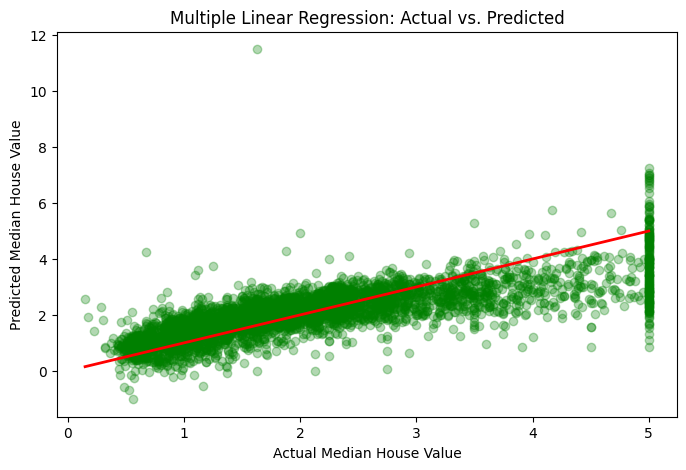

In [18]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_m, y_pred_m, color='green', alpha=0.3)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Multiple Linear Regression: Actual vs. Predicted')
plt.plot([min(y_test_m), max(y_test_m)], [min(y_test_m), max(y_test_m)], color='red', linewidth=2)
plt.show()